# Lead Scoring - Case Study

##### Problem Statement
X Education is an online education company that receives a large number of leads daily but has a low lead conversion rate of around 30%. They want to identify the most potential leads (known as 'Hot Leads') to improve their lead conversion rate. The company has hired you to build a model that assigns a lead score to each lead based on their likelihood to convert into paying customers. The target lead conversion rate is around 80%.

##### Goal of Case Study
Build a logistic regression model that assigns a lead score between 0 and 100 to each lead, indicating their likelihood of converting into paying customers for X Education. Additionally, the model should be adaptable to address any future problems or changes presented by the company.

### Step 1: Importing Libraries and Data

In [1]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing dataset to csv
leads_df=pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe

In [4]:
#Checking head of dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Checking the dimension of the dataframe
leads_df.shape

(9240, 37)

In [6]:
#Statctical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking columns info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### Checking for duplicates

In [8]:
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

There are no Duplicate Values in 'Prospect ID' and 'Lead Number'

## Exploratory Data Analysis

### Step 3: Data Cleaning

##### 3.1 Identifying Missing Values

In [10]:
#Dropping 'Prospect ID' and 'Lead Number' since they have all unique values
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [12]:
#Checking for the count of missing values
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
#Checking the percentage of null values
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### 3.2 Dropping Columns with Missing Values

In [14]:



#Dropping all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [15]:
#Checking percentage of null values in each column after dropping columns with more than 45%
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

##### 3.3 Categorical Attributes Analysis:

###### Imbalanced Variables

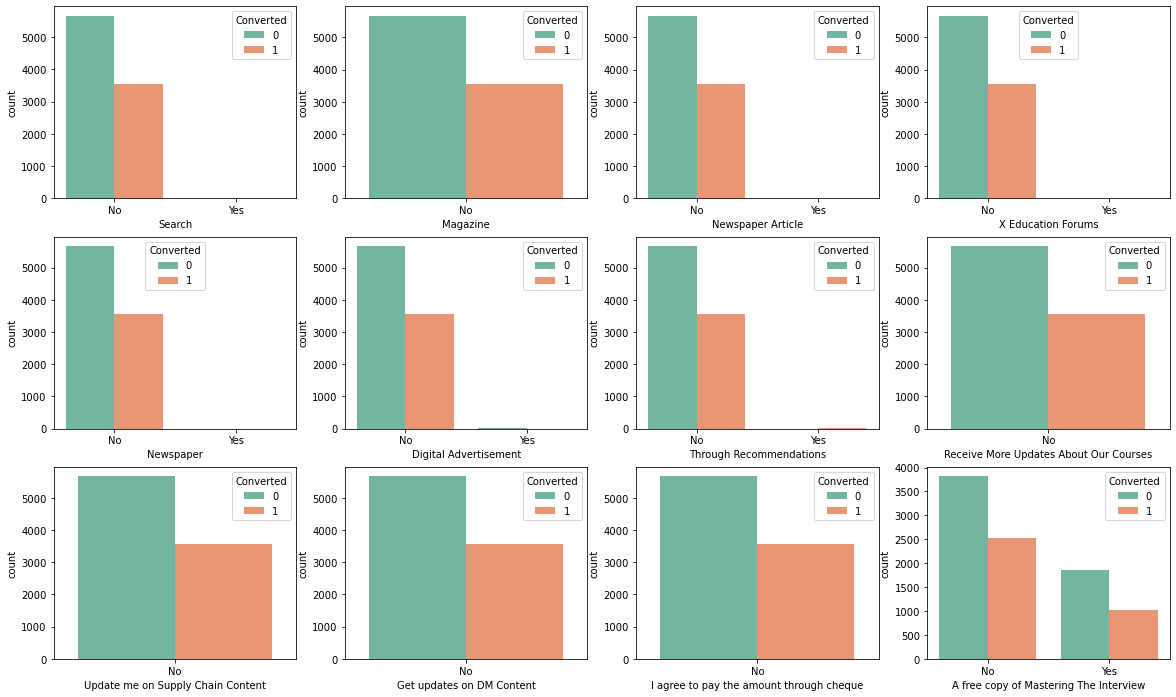

In [16]:
#Visualizing variables for imbalancing 
fig, axs = plt.subplots(3,4,figsize = (20,12))

sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0],palette = 'Set2')

sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1],palette = 'Set2')

sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2],palette = 'Set2')

sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3],palette = 'Set2')

sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0],palette = 'Set2')

sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1],palette = 'Set2')

sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2],palette = 'Set2')

sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3],palette = 'Set2')

sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0],palette = 'Set2')

sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1],palette = 'Set2')

sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2],palette = 'Set2')

sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[2,3],palette = 'Set2')

plt.show()

##### Inference

For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them

"A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [17]:
#Creating a list of columns to be dropped
cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

###### Lead Source

In [18]:
#Checking the value counts of lead source column
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We will impute the missing values with label 'Google' because 'Google' have the highest number of occurences.

In [19]:
#Replacing Nan value with 'Google'
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google', 'Google')

In [20]:
#Combining low frequence values to others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')


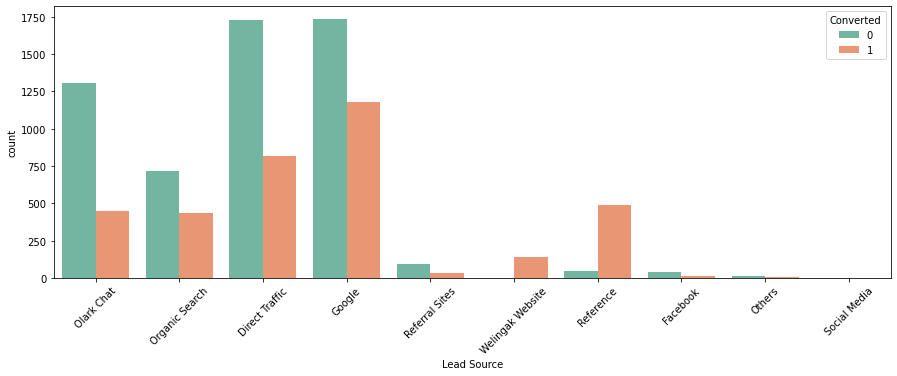

In [21]:
#Visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted', data =leads_df, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

##### Inference

Maximum Leads are generated by Google and Direct Traffic.

Conversion rate of Reference leads and Welinkgak Website leads is very high.

### Country

In [22]:
#Checking value counts of Country column
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [23]:
#Imputing missing values in Country column with 'not provided'
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

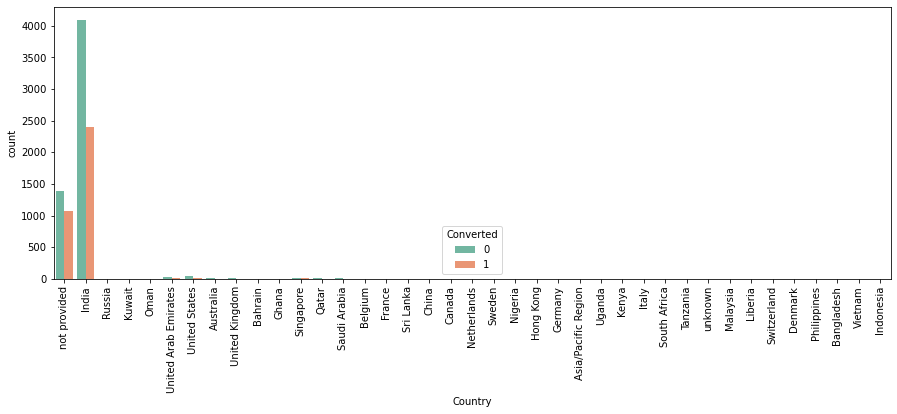

In [24]:
#Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted', data = leads_df, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference
Most of data consists of value 'India', no inference can be drawn from this parameter.

Hence, we can drop this column.

In [25]:
#Creating a list of columns to be dropped
cols_to_drop.append('Country')

#Checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

What is your current occupation

In [26]:
#Checking value counts of 'What is your currrent occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
#Creating new category 'Not provided'
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

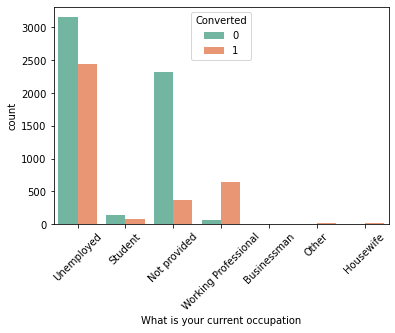

In [28]:
#Visualizing count of variable based on converted value
s1=sns.countplot(x='What is your current occupation', hue='Converted', data = leads_df, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

##### Inference
Maximum leads generated are unemployed and their conversion rate is more than 50%

conversion rate of working professionals is very high

What matters most to you in choosing a course

In [29]:
#Checking value of 'What matters most to you in choosing a course'
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
#Imputing missing values by 'Better Career Prospects'
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

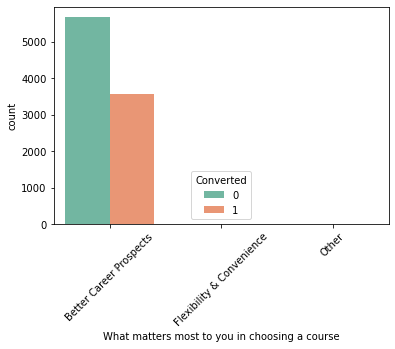

In [31]:
#Visualizing count of variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted', data = leads_df, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

##### Inference
This column spread of variance is very low, hence it can be dropped.

In [32]:
#Append 'What matters most to you in choosing a course' to the cols_to_drop list
cols_to_drop.append('What matters most to you in choosing a course')

#Checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

Last Activity

In [33]:
#Checking value count of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
#Replacing Nan Values with mode value 'Email Opened'
leads_df['Last Acrivity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [35]:
#Combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link clicked', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')

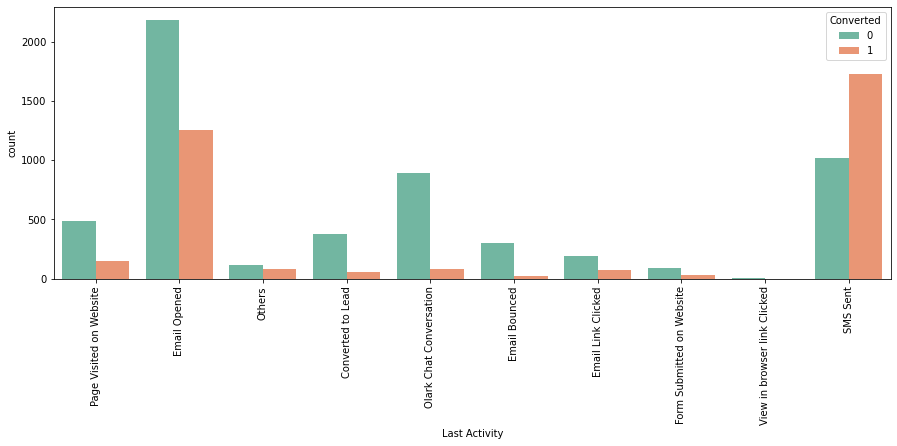

In [36]:
#Visualizing count of Last Activity variable
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted', data = leads_df, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference
Maximum leads are generated having last activity as Email opened but conversion rate is not too good

SMS sent as a last activity has a high conversation rate

In [37]:
#Append 'Last Activity' to the cols_to_drop list it is a S-Education's sales team generated data
cols_to_drop.append('Last Activity')

#Checking updated list for columns to be dropped 
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [38]:
#Checking the Null values in all columns after imputation
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [39]:
#Remaining missing values percentage is less than 2%, we can drop those rows without affcting a data
leads_df = leads_df.dropna()

In [40]:
leads_df.shape

(9103, 26)

In [41]:
#Checking percentage of Null Values in all columns
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

Lead Origin

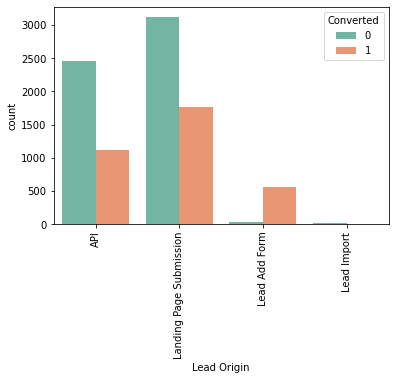

In [42]:
s1=sns.countplot(x='Lead Origin', hue='Converted', data = leads_df, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Do Not Email & Do Not Call

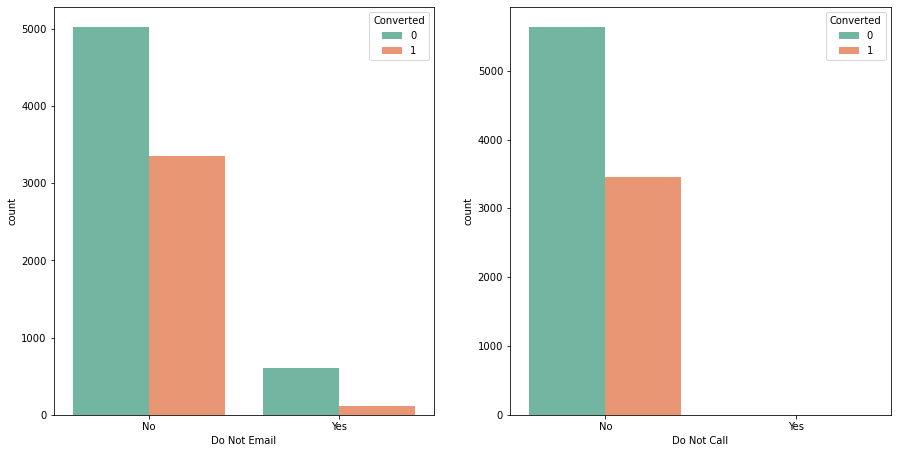

In [43]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set2')
plt.show()

In [44]:
#Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#Checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [45]:
leads_df['Do Not Email']

0        No
1        No
2        No
3        No
4        No
       ... 
9235    Yes
9236     No
9237    Yes
9238     No
9239     No
Name: Do Not Email, Length: 9103, dtype: object

Last Notable Activity

In [46]:
#Checking value count of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [47]:
#Clubbing lower frequency values
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam', 'Unreachable', 'Unsubscribed', 'Email Bounced', 'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront', 'Form Submitted on Website', 'Email Received'], 'Others')


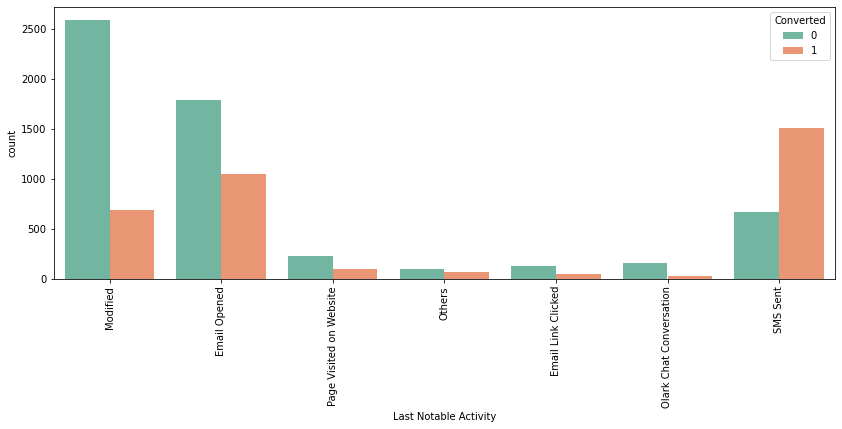

In [48]:
#Visualizing count of Variable based on Converted value
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df, palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

##### Inference
Maximum leads are generated having last activity as Email opened but conversation rate is not too good.

SMS sent as last activity has high conversion rate


In [49]:
#Append 'Last Notable Activity' to the col_to_drop list as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [50]:
#Checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [51]:
#Dropping columns
leads = leads_df.drop(cols_to_drop,1)

#Checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
 8   Last Acrivity                    9103 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 969.2+ KB


In [52]:
#Checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Last Acrivity
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Page Visited on Website
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Unreachable
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Converted to Lead


##### 3.4 Numerical Attributes Analysis:

Converted

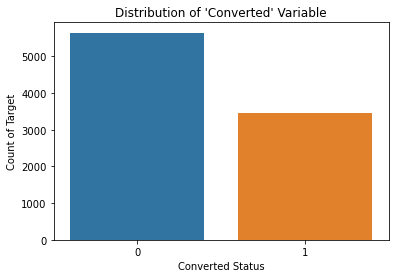

In [53]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [54]:
#Finding conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

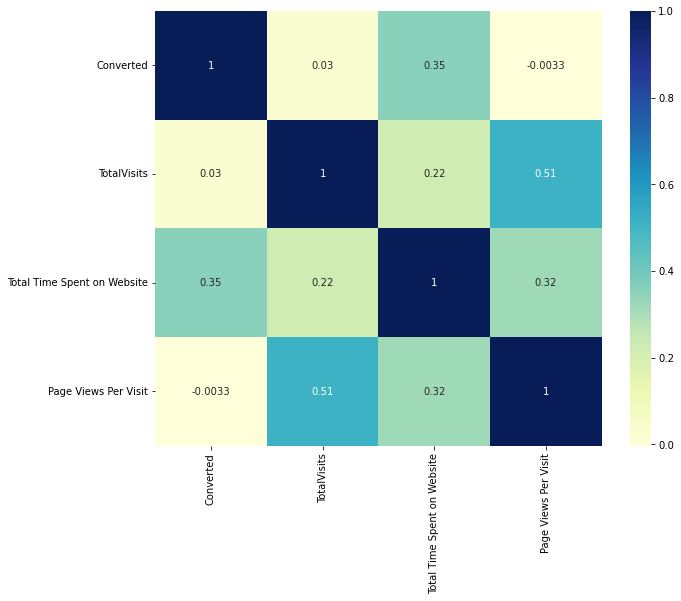

In [55]:
#Checking correlations of numeric values using heatmap

#Size of the figure
plt.figure(figsize=(10,8))

#Heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

Total Visits

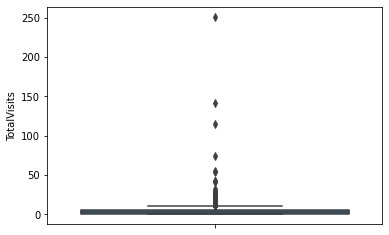

In [56]:
#Visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [57]:
#Checking percentile values for 'Total Visits'

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

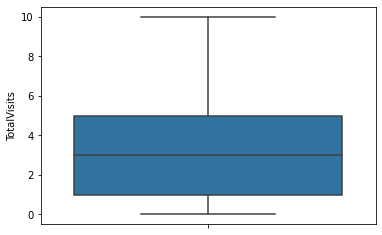

In [58]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#Visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

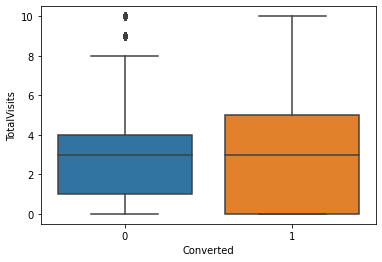

In [59]:
#Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

##### Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

Total time spent on website

In [60]:
#Checking percentiles for 'Total Time Spent on Website'
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

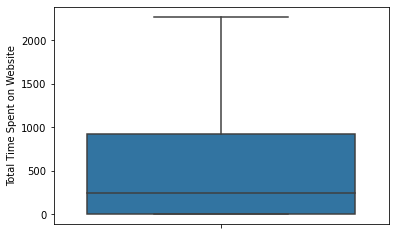

In [61]:
#Visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

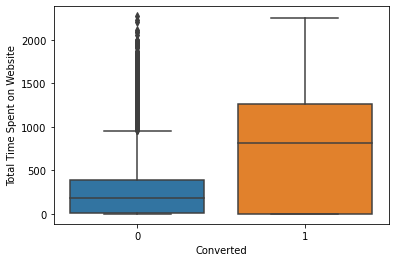

In [62]:
#Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

##### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

Page views per visit

In [63]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

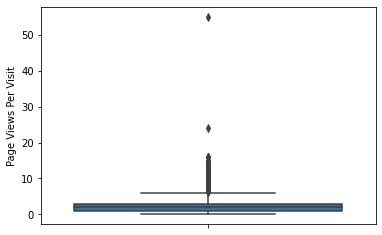

In [64]:
#Visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

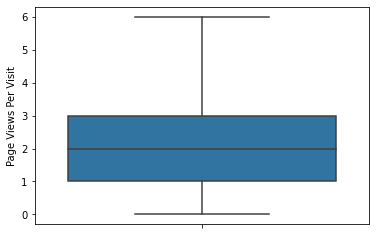

In [65]:
#Outlier Treatment: Capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#Visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

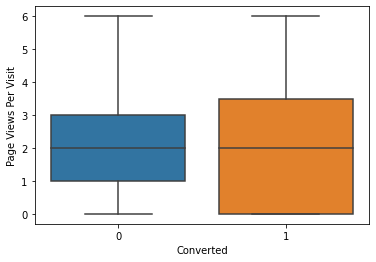

In [66]:
#Visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

##### Inference
Median for converted and not converted leads is almost same.

Nothing conclusive can be said on the basis of Page Views Per Visit.

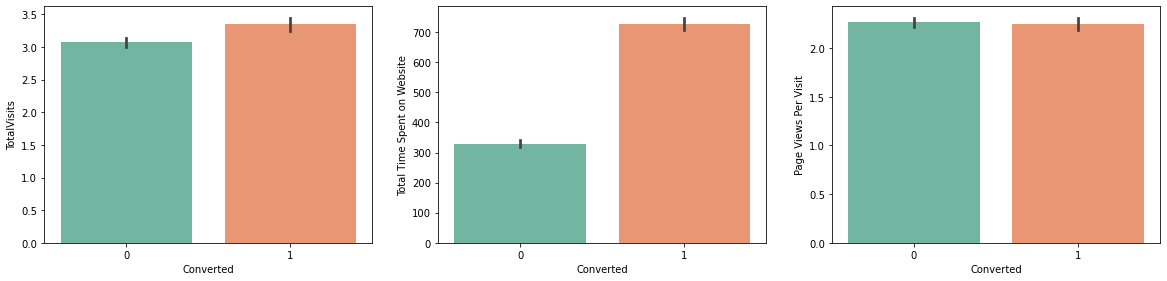

In [67]:
#Now check the conversions for all numeric values
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)

plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)

plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)

plt.show()

##### Inference
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit.

### Step 4: Data Preparation

##### 4.1 Converting some binary variables

In [68]:
#List of variables to map
varlist =  ['Do Not Email']

#Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [69]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Last Acrivity
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,Page Visited on Website
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,Unreachable
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,Converted to Lead


In [70]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
 8   Last Acrivity                    9103 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 969.2+ KB


In [71]:
leads["Do Not Email"] = leads["Do Not Email"].astype(str)

##### 4.2 Dummy Variable Creation

In [72]:
#Getting a list of categorical columns foy creating dummy
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'What is your current occupation', 'Last Acrivity'],
      dtype='object')

In [73]:
#Getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [74]:
#Dropping the original columns after dummy variable creation
leads.drop(cat_cols,1,inplace = True)

In [75]:
#Checking dataset after dummy variable creation
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Step 5: Test-Train Split

In [76]:
#Importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [77]:
#Putting feature variable to X
X=leads.drop('Converted', axis=1)

#Checking head of X
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
#Putting response variable to y
y = leads['Converted']

#Checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [80]:
#Importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [81]:
#Scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#Checking X-train dataset after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5520,1.362470,-0.771066,2.083179,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,0.647106,-0.571257,0.133646,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1566,2.435517,1.393834,0.690655,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9170,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [82]:
X_train[num_cols]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7962,-0.068258,1.476324,-0.423364
5520,1.362470,-0.771066,2.083179
1962,0.647106,-0.571257,0.133646
1566,2.435517,1.393834,0.690655
9170,-1.141305,-0.881052,-1.258878
...,...,...,...
367,0.647106,0.601932,1.526169
82,-1.141305,-0.881052,-1.258878
8173,0.289424,1.445161,-0.144859
7055,-0.068258,-0.754568,0.412150


In [83]:
#Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.02043282434362

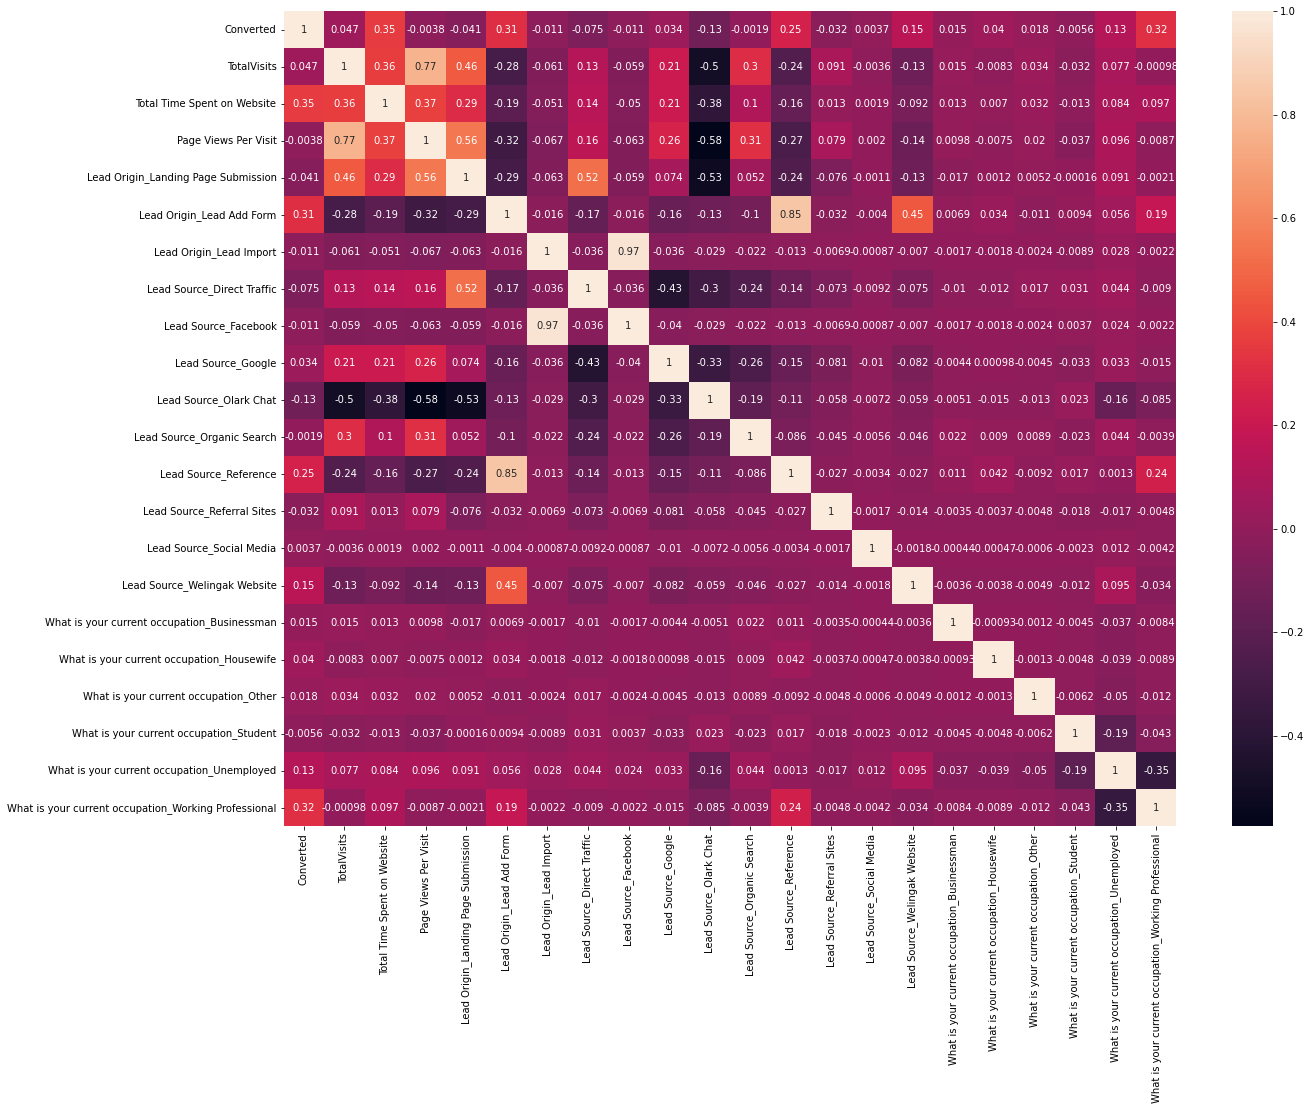

In [84]:
#Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

Dropping highly correlated dummy variables

In [85]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [86]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

# Checking the Correlation Matrix

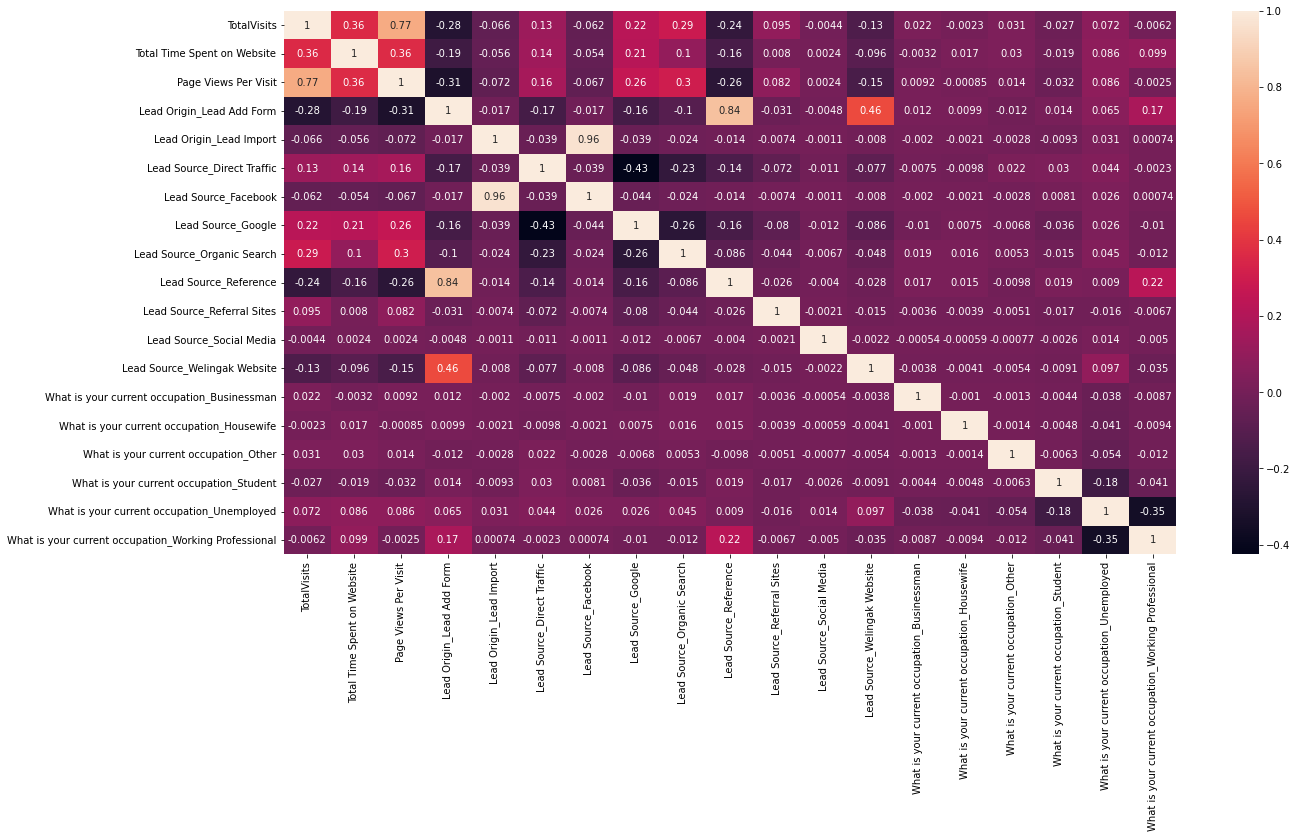

In [87]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Step 7: Model Building

-let's start by splitting our data into a training set and a test set.

# Running Your First Training Model

In [88]:
import statsmodels.api as sm

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.9
Date:                Thu, 02 Mar 2023   Deviance:                       5769.8
Time:                        16:59:52   Pearson chi2:                 6.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0551      0.111     -9.490      0.000      -1.273      -0.837
TotalVisits                                              0.3040      0.050      6.110      0.000       0.206       0.401
Total Time Spent on Website                              1.0923      0.038     28.520      0.000       1.017       1.167
Page Views Per Visit                                    -0.1336      0.056     -2.390      0.017      -0.243      -0.024
Lead Origin_Lead Add Form                                3.8915      0.755      5.157      0.000       2.413       5.371
Lead Origin_Lead Import                                  0.9380      1.588      0.591      0.555      -2.174       4.050
Lead Source_Direct Traffic                              -1.3080      0.128    -10.230      0.000      -1.559      -1.057
Lead Source_Facebook                                    -0.8343      1.590     -0.525      0.600      -3.950       2.281
Lead Source_Google                                      -0.9838      0.127     -7.717      0.000      -1.234      -0.734
Lead Source_Organic Search                              -1.2017      0.156     -7.698      0.000      -1.508      -0.896
Lead Source_Reference                                   -1.0512      0.787     -1.335      0.182      -2.594       0.492
Lead Source_Referral Sites                              -1.6574      0.348     -4.764      0.000      -2.339      -0.976
Lead Source_Social Media                                -0.3212      1.522     -0.211      0.833      -3.304       2.661
Lead Source_Welingak Website                             0.7952      1.041      0.764      0.445      -1.245       2.835
What is your current occupation_Businessman              1.4252      0.993      1.435      0.151      -0.521       3.371
What is your current occupation_Housewife               24.0622   1.59e+04      0.002      0.999   -3.11e+04    3.11e+04
What is your current occupation_Other                    1.2183      0.651      1.873      0.061      -0.057       2.493
What is your current occupation_Student                  1.1988      0.224      5.340      0.000       0.759       1.639
What is your current occupation_Unemployed               1.3244      0.084     15.852      0.000       1.161       1.488
What is your current occupation_Working Professional     3.8476      0.189     20.410      0.000       3.478       4.217
========================================================================================================================
"""

In [90]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,18.31
9,Lead Source_Reference,14.11
4,Lead Origin_Lead Import,13.33
6,Lead Source_Facebook,13.33
12,Lead Source_Welingak Website,5.12
17,What is your current occupation_Unemployed,2.79
2,Page Views Per Visit,2.71
0,TotalVisits,2.52
7,Lead Source_Google,1.92
5,Lead Source_Direct Traffic,1.78


In [92]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [93]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2911.3
Date:                Thu, 02 Mar 2023   Deviance:                       5822.6
Time:                        16:59:52   Pearson chi2:                 6.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1126      0.110    -10.098      0.000      -1.329      -0.897
TotalVisits                                              0.2917      0.050      5.891      0.000       0.195       0.389
Total Time Spent on Website                              1.0737      0.038     28.281      0.000       0.999       1.148
Page Views Per Visit                                    -0.1653      0.056     -2.970      0.003      -0.274      -0.056
Lead Origin_Lead Import                                  0.8293      1.579      0.525      0.600      -2.266       3.925
Lead Source_Direct Traffic                              -1.2480      0.126     -9.901      0.000      -1.495      -1.001
Lead Source_Facebook                                    -0.7517      1.581     -0.475      0.634      -3.850       2.347
Lead Source_Google                                      -0.8832      0.125     -7.064      0.000      -1.128      -0.638
Lead Source_Organic Search                              -1.1193      0.154     -7.263      0.000      -1.421      -0.817
Lead Source_Reference                                    2.8083      0.231     12.172      0.000       2.356       3.261
Lead Source_Referral Sites                              -1.5739      0.345     -4.556      0.000      -2.251      -0.897
Lead Source_Social Media                                -0.2811      1.521     -0.185      0.853      -3.262       2.700
Lead Source_Welingak Website                             4.6537      0.719      6.471      0.000       3.244       6.063
What is your current occupation_Businessman              1.4390      0.988      1.457      0.145      -0.497       3.375
What is your current occupation_Housewife               24.0343   1.59e+04      0.002      0.999   -3.12e+04    3.13e+04
What is your current occupation_Other                    1.2386      0.650      1.905      0.057      -0.036       2.513
What is your current occupation_Student                  1.2305      0.223      5.529      0.000       0.794       1.667
What is your current occupation_Unemployed               1.3454      0.083     16.170      0.000       1.182       1.509
What is your current occupation_Working Professional     3.8525      0.188     20.477      0.000       3.484       4.221
========================================================================================================================
"""

In [94]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Import,13.33
5,Lead Source_Facebook,13.33
16,What is your current occupation_Unemployed,2.79
2,Page Views Per Visit,2.70
0,TotalVisits,2.51
6,Lead Source_Google,1.92
4,Lead Source_Direct Traffic,1.78
7,Lead Source_Organic Search,1.54
17,What is your current occupation_Working Profes...,1.32
8,Lead Source_Reference,1.30


In [95]:
X_train.drop('Lead Origin_Lead Import', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2911.4
Date:                Thu, 02 Mar 2023   Deviance:                       5822.8
Time:                        16:59:52   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1144      0.110    -10.120      0.000      -1.330      -0.899
TotalVisits                                              0.2916      0.050      5.889      0.000       0.195       0.389
Total Time Spent on Website                              1.0733      0.038     28.280      0.000       0.999       1.148
Page Views Per Visit                                    -0.1665      0.056     -2.994      0.003      -0.275      -0.057
Lead Source_Direct Traffic                              -1.2458      0.126     -9.891      0.000      -1.493      -0.999
Lead Source_Facebook                                     0.0408      0.444      0.092      0.927      -0.830       0.912
Lead Source_Google                                      -0.8804      0.125     -7.049      0.000      -1.125      -0.636
Lead Source_Organic Search                              -1.1165      0.154     -7.250      0.000      -1.418      -0.815
Lead Source_Reference                                    2.8082      0.231     12.171      0.000       2.356       3.260
Lead Source_Referral Sites                              -1.5712      0.345     -4.549      0.000      -2.248      -0.894
Lead Source_Social Media                                -0.2795      1.521     -0.184      0.854      -3.261       2.702
Lead Source_Welingak Website                             4.6532      0.719      6.471      0.000       3.244       6.063
What is your current occupation_Businessman              1.4392      0.988      1.457      0.145      -0.497       3.375
What is your current occupation_Housewife               24.0333   1.59e+04      0.002      0.999   -3.12e+04    3.13e+04
What is your current occupation_Other                    1.2389      0.650      1.906      0.057      -0.035       2.513
What is your current occupation_Student                  1.2223      0.222      5.502      0.000       0.787       1.658
What is your current occupation_Unemployed               1.3458      0.083     16.176      0.000       1.183       1.509
What is your current occupation_Working Professional     3.8526      0.188     20.478      0.000       3.484       4.221
========================================================================================================================
"""

In [97]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,2.79
2,Page Views Per Visit,2.70
0,TotalVisits,2.51
5,Lead Source_Google,1.92
3,Lead Source_Direct Traffic,1.78
6,Lead Source_Organic Search,1.54
16,What is your current occupation_Working Profes...,1.32
7,Lead Source_Reference,1.30
1,Total Time Spent on Website,1.22
10,Lead Source_Welingak Website,1.08


# Creating Prediction

In [98]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.728314
5520    0.142892
1962    0.250544
1566    0.981090
9170    0.302071
5097    0.101262
8954    0.263478
309     0.286842
5519    0.101262
1050    0.610122
dtype: float64

In [99]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7283143 , 0.14289176, 0.25054382, 0.98108995, 0.30207056,
       0.10126181, 0.26347848, 0.2868421 , 0.10126181, 0.61012233])

In [100]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.728314
1,0,0.142892
2,0,0.250544
3,1,0.981090
4,0,0.302071


In [101]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.728314,1
1,0,0.142892,0
2,0,0.250544,0
3,1,0.981090,1
4,0,0.302071,0


# Model Evaluation

In [102]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [103]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3506,  447],
       [ 897, 1522]], dtype=int64)

In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7890772128060264

In [105]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [106]:
# Calculating the sensitivity
TP/(TP+FN)

0.6291856138900372

In [107]:
# Calculating the specificity
TN/(TN+FP)

0.8869213255755123

# ___With the current cut off as 0.5 we have around 79% accuracy, sensitivity of around 63% and specificity of around 89%.___

# Optimise Cut off (ROC Curve)

In [108]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

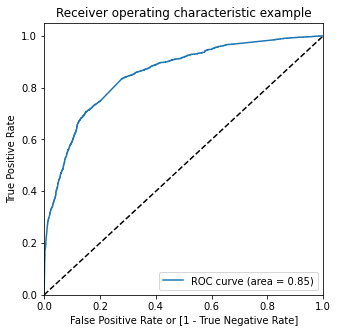

In [110]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [111]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.728314,1,1,1,1,1,1,1,1,1,0,0
1,0,0.142892,0,1,1,0,0,0,0,0,0,0,0
2,0,0.250544,0,1,1,1,0,0,0,0,0,0,0
3,1,0.981090,1,1,1,1,1,1,1,1,1,1,1
4,0,0.302071,0,1,1,1,1,0,0,0,0,0,0


In [112]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379630,1.000000,0.000000
0.1,0.1,0.487602,0.984291,0.183658
0.2,0.2,0.686911,0.901612,0.555527
0.3,0.3,0.765380,0.831749,0.724766
0.4,0.4,0.795669,0.694915,0.857324
0.5,0.5,0.789077,0.629186,0.886921
0.6,0.6,0.778876,0.556015,0.915254
0.7,0.7,0.759259,0.460107,0.942322
0.8,0.8,0.731795,0.342704,0.969896
0.9,0.9,0.689109,0.189748,0.994688


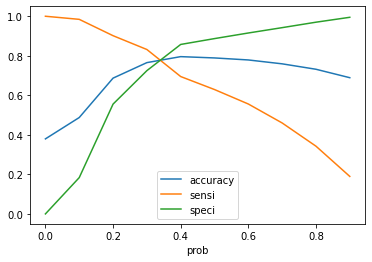

In [113]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# ___From the graph it is visible that the optimal cut off is at 0.35.___

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.728314,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.142892,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.250544,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.981090,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.302071,0,1,1,1,1,0,0,0,0,0,0,0


In [115]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908035153797865

In [116]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3299,  654],
       [ 679, 1740]], dtype=int64)

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Calculating the sensitivity
TP/(TP+FN)

0.7193054981397271

In [119]:
# Calculating the specificity
TN/(TN+FP)

0.8345560333923603

# Prediction on Test Set

In [120]:
X_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,3.0,424,3.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,0.0,0,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,2.0,712,2.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,4.0,423,4.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,7.0,247,1.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,4.0,74,2.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
315,2.0,362,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3766,4.0,103,4.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8043,6.0,1094,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [121]:
# Scaling numeric values
#X_test[['Do Not Email','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform([['Do Not Email','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [122]:
X_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.068258,-0.103815,0.412150,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-1.141305,-0.881052,-1.258878,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,-0.425940,0.424120,-0.144859,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,0.289424,-0.105648,0.969160,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,1.362470,-0.428274,-0.284112,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,0.289424,-0.745402,-0.144859,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
315,-0.425940,-0.217467,-0.144859,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3766,0.289424,-0.692242,0.969160,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8043,1.004788,1.124367,-0.144859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
# Substituting all the columns in the final train model
col = X_train.columns

In [125]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,1.0,-0.068258,-0.103815,0.412150,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,1.0,-1.141305,-0.881052,-1.258878,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,1.0,-0.425940,0.424120,-0.144859,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,1.0,0.289424,-0.105648,0.969160,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,1.0,1.362470,-0.428274,-0.284112,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,1.0,0.289424,-0.745402,-0.144859,1,0,0,0,0,0,0,0,0,0,0,0,1,0
315,1.0,-0.425940,-0.217467,-0.144859,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3766,1.0,0.289424,-0.692242,0.969160,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8043,1.0,1.004788,1.124367,-0.144859,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [126]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.252558
1,1,0.877689
2,0,0.340904
3,0,0.254375
4,1,0.263190


In [127]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.252558,0
1,1,0.877689,1
2,0,0.340904,0
3,0,0.254375,0
4,1,0.263190,0
...,...,...,...
2726,0,0.153694,0
2727,0,0.272390,0
2728,0,0.056530,0
2729,1,0.852622,1


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7909190772610766

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1422,  267],
       [ 304,  738]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

0.708253358925144

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.8419182948490231

# ___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 84%.___

# Precision Recall

In [135]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3506,  447],
       [ 897, 1522]], dtype=int64)

In [136]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7729812087353987

In [137]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6291856138900372

___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___

# Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

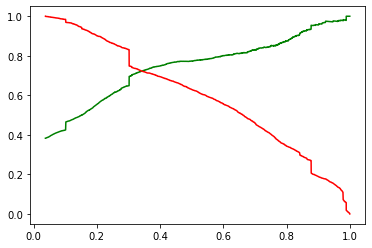

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.728314,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.142892,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.250544,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.981090,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.302071,0,1,1,1,1,0,0,0,0,0,0,0


In [143]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7958254865034526

In [144]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3405,  548],
       [ 753, 1666]], dtype=int64)

In [145]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [146]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7524841915085817

In [147]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6887143447705664

# Prediction on Test set

In [148]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.252558
1,1,0.877689
2,0,0.340904
3,0,0.254375
4,1,0.263190


In [149]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.252558,0
1,1,0.877689,1
2,0,0.340904,0
3,0,0.254375,0
4,1,0.263190,0
...,...,...,...
2726,0,0.153694,0
2727,0,0.272390,0
2728,0,0.056530,0
2729,1,0.852622,1


In [150]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7942145734163311

In [151]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1461,  228],
       [ 334,  708]], dtype=int64)

In [152]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [153]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7564102564102564

In [154]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6794625719769674

# Conclusion

It was found that the variables that mattered the most in the potential buyers are

1.TotalVisits
2.Total Time Spent on Website
3.Page Views Per Visit

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.